# 2021/11/2
# 本代码绘制整层积分的MSE

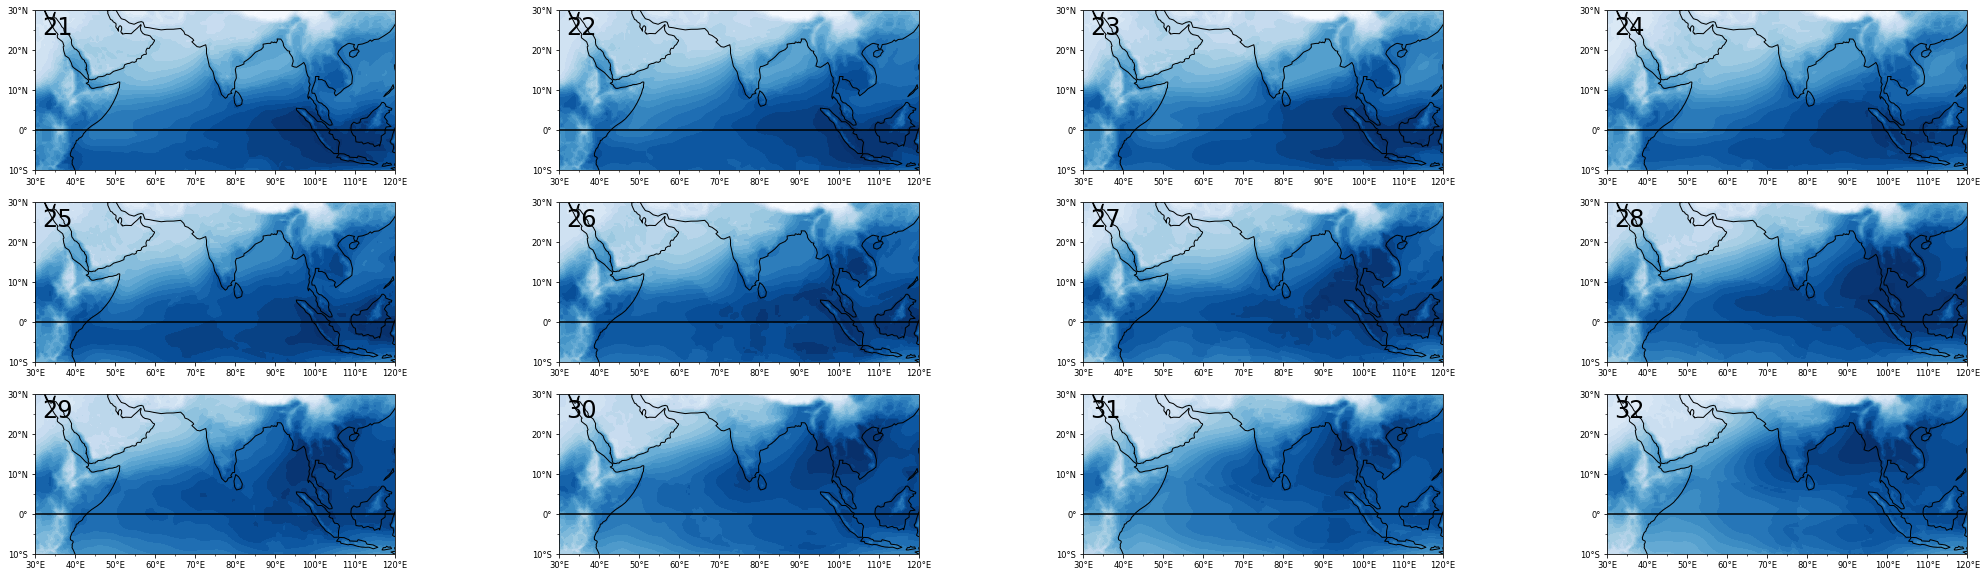

In [5]:
import os
import sys
import xarray as xr
import numpy as np
module_path = ["/home/sun/mycode/module/","/data5/2019swh/mycode/module/"]
sys.path.append(module_path[0])
from module_sun import *
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

f  = xr.open_dataset("/home/sun/data/merra2_integrated_mse.nc").sel(lat=slice(-10,30),lon=slice(30,120))

'''设置绘图区域'''
lonmin,lonmax,latmin,latmax = 30,120,-10,30
extent  = [lonmin,lonmax,latmin,latmax]
tmin,tmax = 20,31 

proj = ccrs.PlateCarree()
fig1 = plt.figure(figsize=(36,10))
spec1 = fig1.add_gridspec(nrows=3,ncols=4)

j = 0
for row in range(3):
    for col in range(4):
        ax = fig1.add_subplot(spec1[row,col],projection=proj)
        ax.coastlines(resolution='110m',lw=1)
        # 设置经纬度刻度.
        set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
        ax.set_extent(extent, crs=proj)

        im = ax.contourf(f.lon,f.lat,f.integrated_mse.data[j+tmin,:],levels =25,cmap='Blues',alpha=1,extend='both')
        ax.plot([30,120],[0,0],color='k')

        ax.text(0.02,0.85,str(j+21),transform=ax.transAxes,fontsize=24)

        j += 1

!mkdir -p /home/sun/paint/mse
plt.savefig('/home/sun/paint/mse/integrated_mse_merra2.pdf', bbox_inches='tight',dpi=1200)
plt.show()